### Project 3 - Regression - Spring 2025

# Predicting House Prices Through Regression Models
<hr>

## Introduction

The Real Estate market is always a very popular topic no matter where you are, sellers and buyers alike have strong interests in knowing what houses in the area cost. In particular, lets look at Ames, Iowa, and predict how much the houses in that area may cost based on important price negotiation factors. 

In the dataset below, you will find 79 variables describing almsot every aspect of a residental home ranging from the sales price to every little aspect of the buildings quality. I will be using the 'train.csv' file only and splitting the dataset into training and testing subsets.

Dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data 

Throughout this project, I will be predicting housing prices through regression methods where I will switch out different variables and features to learn which model or method works the best when trying to predict the Ames, Iowa Real Estate Market. Let's learn more about what I mean when I use the word, regression! 

<hr>

## Regression - How Does It Work?

Regression analysis is a statisitcal method used to examine the relationship between two or more vairbales, typically used to predict how changes in one variable effect another. There are many types of regression models we could use but for the purpose of this project, I am going to be using the Multiple Linear Regression method since we are dealing with many different variables. While linear regression focuses on the regression of a dependent variable on one independent variable, mulitple linear regression extends the model to show how one dependent variable is regressed on multiple independent variables. 

Let's break down the mathmatical formula for Multiple Linear Regression.  
The formula: Y = $β_0$ + $β_1$ $X_1$ + $β_2$ $X_2$ + ... + $β_n$ $X_n$ + ε 

- Y: Dependent Variable. This is the output or target you're trying to predict or explain. In this case, our Y variable is the price of the house, that is what we are trying to find/predict.

- $β_0$: Intercept. This is the value of Y when all X variables are zero, represents the baseline value before considering any predictors.

- $β_1$, $β_2$, ... , $β_n$ **:** Coeffcients or the Slope. Indicates the effect of the correspond $X_i$ on Y. For example, $X_i$ could be the square footage of the house and I established that Y is the selling price of the house, so if the square footage increases then that mean Y increases, but leave all other variables that don't effect the selling price out.

- $X_i$ : Independent Variables or Predictors. This is input features used to predict **Y**. In this case, the number of bedrooms or location of a house would be a predictor of the overall selling price.

- ε **:** Error term. This captures the unexplain variation, the factors that are not accounted for by the model such as loud noise surrounding the location of a house.

In conclusion, we are modeling the relationship between how the changes of ceratin inputs effect the overall output. In this case, the relationship between certain selling points of a house and the effect the overall price of the house. 



<hr>

## Opening Pre-Processing

Before we get into our main experiment, I'm going to import software I'll be using throughout the project, reading the csv file so we can see all our variables, and detail editing the dataset.

In [201]:
#Importing software

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [203]:
# Reading the csv file

hd = pd.read_csv("train.csv")
hd

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In this code, I dropped the 'SalePrice' variable because that is what I want to predict using our other variables. Remember, the SalePrice is the Y. Then, I made the values within the dataset numeric in order to make the regression models work.

In [206]:
#Dropping variables
hd = hd.drop("SalePrice", axis=1) #The variable I want to predict using other features
hd = hd.drop("Id", axis=1) #Useless when making a regression model 
y = house_data["SalePrice"] #Extracting the target variable

#Making the values in the dataset numeric so the regression models work
hd = hd.fillna(X.median(numeric_only=True))

hd

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


The dataset is now in the position where we can start experimenting with certain features to predict different house prices!

<hr>


## Experiment 1

### Data Understanding 

To better understand the data, I've provided three data visuals: a heatmap, a histogram, and a pairplot. For the data understanding, I've used the origingal dataset before I took out our target variable. Let's review what each one is saying!


The best visual to show the correlation between different factors is a heatmap. Looking in the SalePrice column, we can see what factors strongly effect this variable. For instance, we can see that 'GrLivArea', or  above ground living square feet, has a large impact on the SalesPrice which is why we will be using this variable in our upcoming experiement. On the other hand, we can see how the variable "Id" does not have a real or negative effect the SalePrice very much, which justifys why we took out the "Id" variable in our original pre-processing.

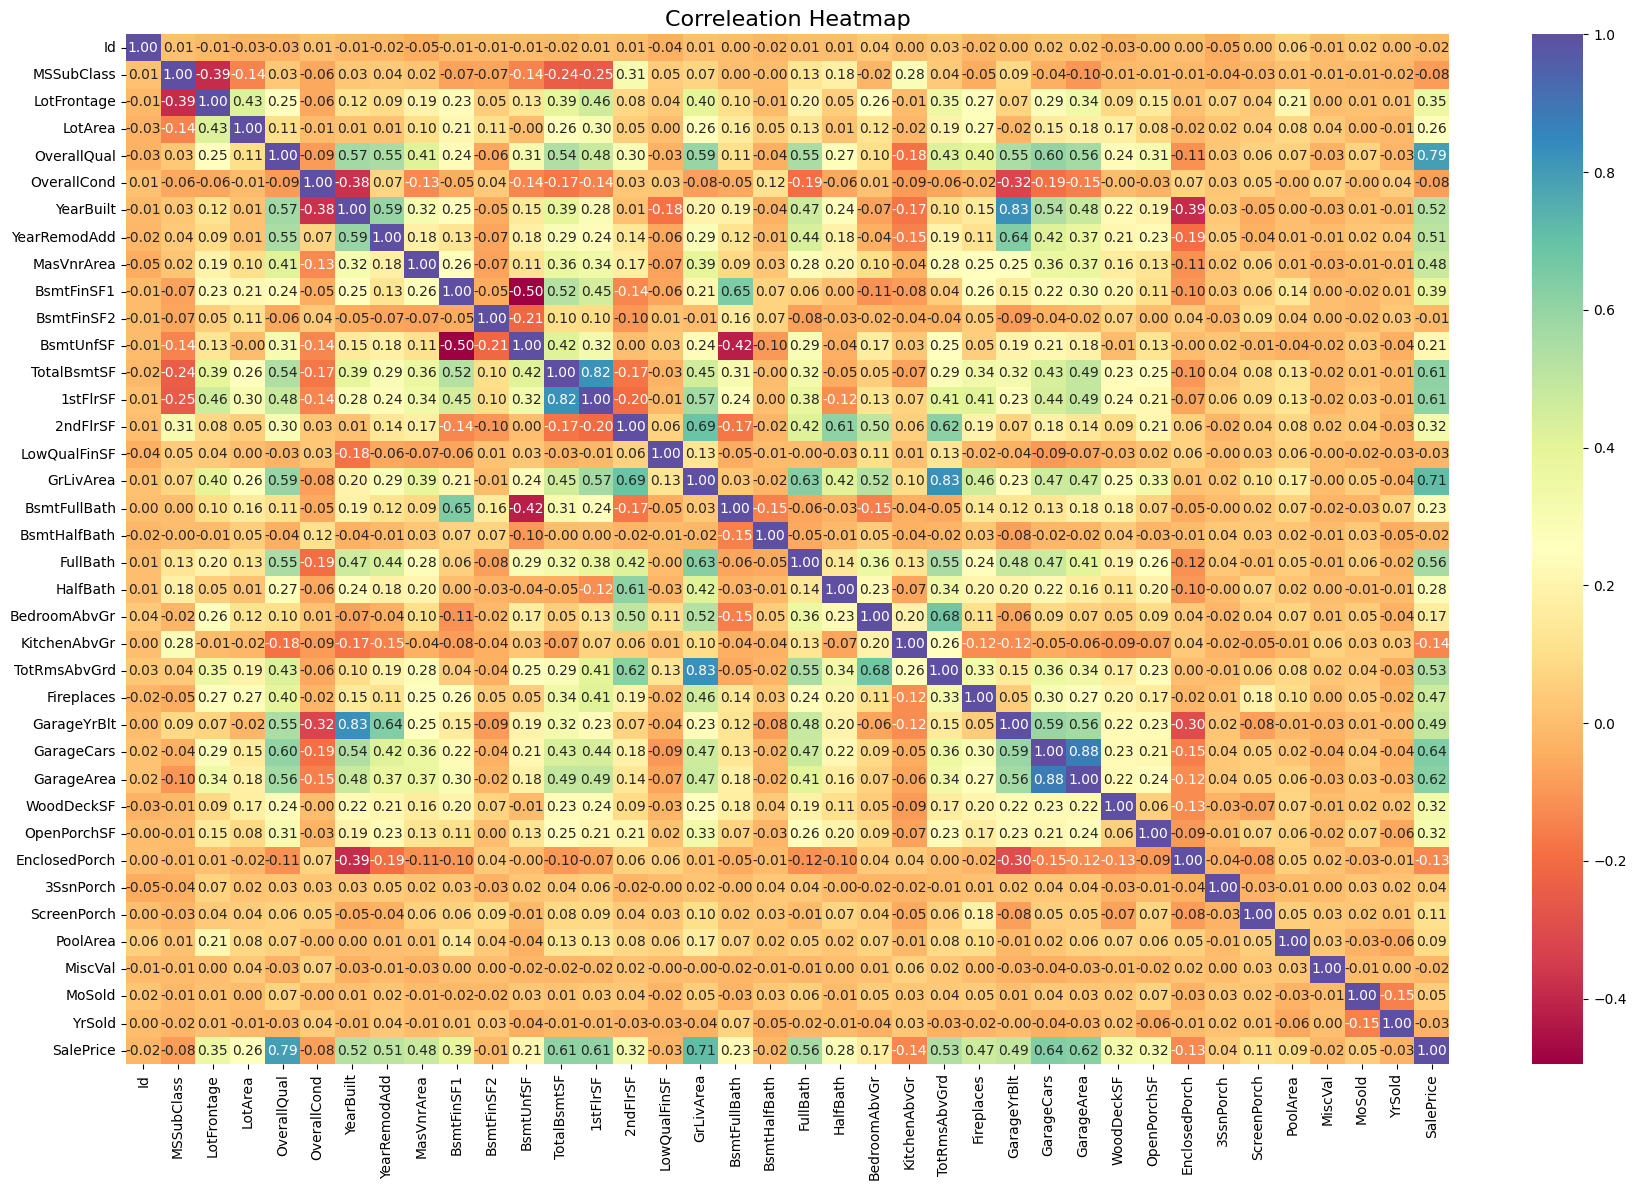

In [212]:
matrix = house_data.corr(numeric_only=True)

#Making the heatmap
plt.figure(figsize=(18,12))
plt.xticks(rotation=45)
plt.yticks(rotation=0)
sns.heatmap(matrix, annot =True, fmt=".2f", cmap="Spectral")
plt.title("Correleation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

Futhermore, I've added two more graphs to help better understand the data. While we will mostly be referring to the heatmap, these graphs are good for showing how variables correlate to each other. 

By looking at the histogram, the X-axis shows the number of houses sold and the Y-axis shows how much the houses sold for. For instance, you can see that 150 houses sold for inbetween 100,000 and 200,000 dollars. This is important because we can see the sweet spot for the sales price and now can use our experiments to see the best factors that make up the sweetspot for the most desired houses. 

For the pairplot visual, I selected a certain features from our dataset so you can see how they each effect each other. Take a look to see the features that have a positive effect on the sales price!

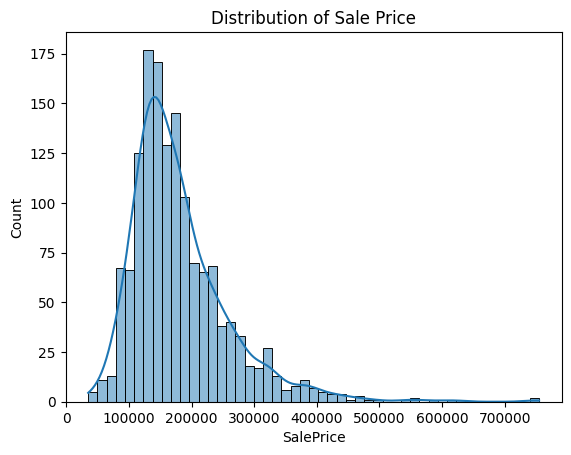

In [214]:
sns.histplot(house_data["SalePrice"], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

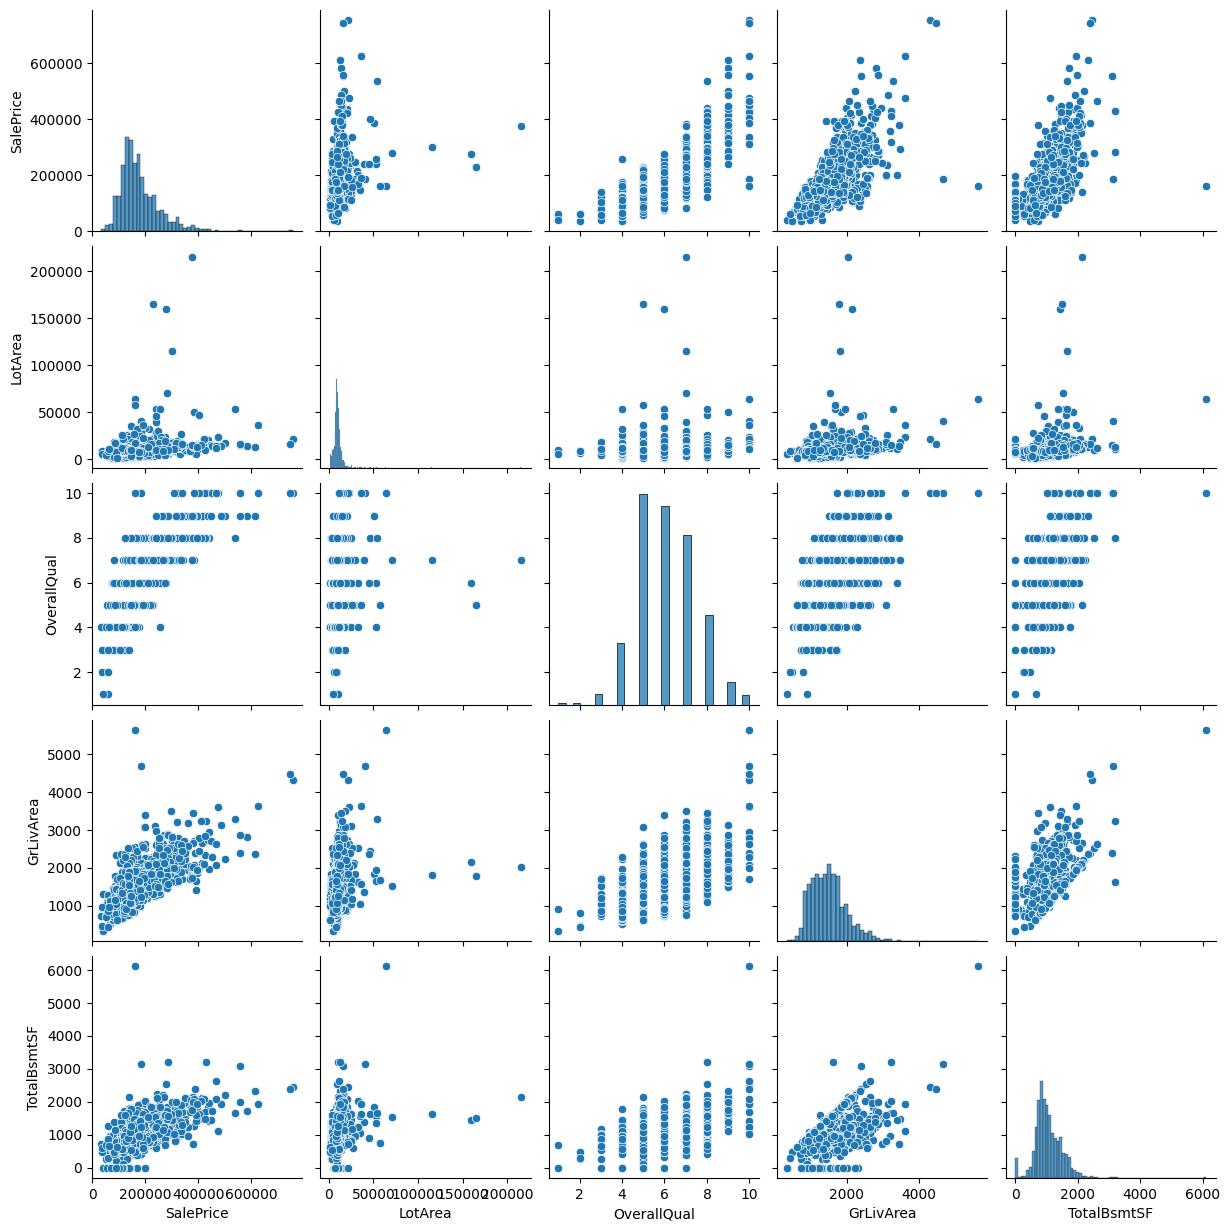

In [215]:
selected_features = ["SalePrice", "LotArea", "OverallQual", "GrLivArea", "TotalBsmtSF"]
sns.pairplot(house_data[selected_features])
plt.show()

### Pre-Processing

For our experiment 1 preprocessing, I'm going to build on what pre-processing I did at the opening on the project. For starters, I took out the SalePrice column because that was the column we are trying to predict by using other variables.

For my first experiment, I'm going to use all the variables that have to do with square footage, since some off the top variables that correlate to SalePrice are sqaure foot features. (Please refer to the heatmap)
Sqaurefoot Features are:
- GrLivArea: Above grade living area square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First floor sqaure feet
- 2ndFlrSF: Second floor square feet
- GarageArea:Size of garage in square feet
- BsmtFinSF1:Type 1 finished square feet
- BsmtFinSF2:Type 2 finished square feet
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in sqaure feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: screen porch area in square feet
- PoolArea: Pool area in square feet
- LotArea: Lot size in square feet
- MasVnrArea:Masonry Veneer area in square feet

### Modeling 

This is the modeling for all the square feet a house could have packed into one model. 

In [221]:
squarefootage_features = ["GrLivArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GarageArea", "BsmtFinSF1", "BsmtFinSF2", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "LotArea", "MasVnrArea", "PoolArea"]
X = house_data[squarefootage_features]
y = house_data["SalePrice"] 

X = X.fillna(hd.median(numeric_only=True))

## Splitting code into train and test sets
# X_train = Study Hours - training feature
# X_test = Study Hours - test features
# y_train = training lables - Pass/Fail
# y_test = test lables - Pass/Fail
# test_size = 20% of data is used for testing and 80% is used from training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Square Error: {mse:,.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Square Error: 1,845,236,377.30
R^2 Score: 0.7594


### Evaluation

Now, is hail marying all your square footage into modeling going to get you the best prediction for the sales price? Absolutely not! Packing a house full of square footage is not the only influencial features to determining how much a house costs. If this house is packed with squarefootage, a few things can happen, the price gets raised by a large amount or it could be in the worst neighborhood making the quality sink and then no one wants to buy it. 

The R square score shows that 75.97% of the variation in the best prediction for the sale price is explained by this model, which is a great sign. 

The Mean Square Error is in squared dollar units which make it hard to understand the average squared difference between the actual and predicted prices. Below, I have added code to convert that number in Root Mean Squared Error which shows the readable average difference. 
$43,000 is how much this model is off when predicting the best sales price for a house. 

In [224]:
rmse = np.sqrt(1845236377.30)
print(rmse)

42956.21465282992


<hr>

## Experiment 2

Now, for experiment 2 I'm going to take the top influential square footage features to sales price while also choosing the other top features based on the heatmap.

Features being used:
- OverallQual
- GrLivArea
- YearBuilt
- Fireplaces
- GarageArea

In [230]:
exTwo_features = ["OverallQual", "GrLivArea", "YearBuilt", "Fireplaces", "GarageArea"]
X = house_data[exTwo_features]
y = house_data["SalePrice"] 

X = X.fillna(hd.median(numeric_only=True))

## Splitting code into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Square Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Square Error: 1,725,863,986.00
Root Mean Squared Error: 41,543.52
R^2 Score: 0.7750


### Evaluation

This experiment did a little better than our first experiment, but obviously we are still not finding the perfect seqeunce to predicting the best housing prices. 

We are $41,543.52 off from but its still around 2,000 dollars better than the first experiment. 
The R squared score shows that are second model contains 77.50% of the best feautres to predict housing prices.

<hr>

## Experiment 3

For our third experiment, I'm going to use the top ten feautures that best correlate to the sales price of a house based off the heatmap. 

Features being used:
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrd
- YearBuilt
- YearRemodAdd

In [241]:
exThree_features = ["OverallQual", "GrLivArea", "YearBuilt", "GarageArea", "GarageCars", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]
X = house_data[exThree_features]
y = house_data["SalePrice"] 

X = X.fillna(hd.median(numeric_only=True))

## Splitting code into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Square Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Square Error: 1,558,239,575.15
Root Mean Squared Error: 39,474.54
R^2 Score: 0.7968


### Evaluation

For our third experiment, we got out best numbers yet. This time we are only $39,474.54 off from the best house price, which is 3,481 dollars better than our first experiment. Based on our R squared score, this model contains 79.68% of the best features to make the best housing price predictions. 

<hr>

## Conclusion & Impact 

In conclusion, predicting house prices is very hard. Though I started strong with the first experiment and continued to get closer through the other two experiments, I was still very off on what the perfect combination of features are that effects the sales prices of a house the most. If I could do another experiement, I would now add in location factors which I did not do in any on my experiments. I've learned so much from this project, starting with how much weight square footage and overall quality of house impact the sales price. I've learned how to successfully make regression models to help show how good I am at predictions, as you can see I need some work. I'm very proud of this assignment, and learned that by including some features and exluding others I was able to get higher numbers and better predictions. 

In my opinion, this project has a very large impact on my thought process for future data analysis techniques. Not only has this project taugh me how specifc the housing market is, it tuaght me to take into account the little correlation amounts can have a great effect along with the big correlation effects. I believe that people can look at this project and learn how important and crucial regression model and calculations are to predicting future concepts!

<hr>

## References 

- https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview
- My Brain :)